# Bayesian Statistics 
### (Duke University - Coursera)

## Inference for a proportion: Bayesian Approach (week 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom

In [2]:
# Probability models and priors
p = np.linspace(0.1, 0.9, num=9)
priors = [0.06, 0.06, 0.06, 0.06, 0.52, 0.06, 0.06, 0.06, 0.06]

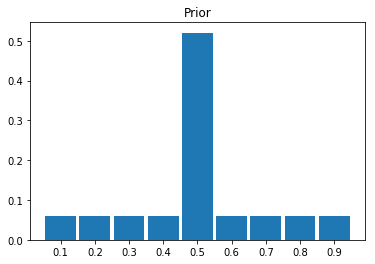

In [3]:
# Plot prior
plt.bar(p, priors, width = 0.09, align = 'center')
plt.xticks(p)
plt.title('Prior')

plt.show()

In [4]:
# Calculate likelihood based on binomial distribuition
def binomial_likelihood(k, n, p): 
    likelihood = []
    for probability in p: 
        l = binom.pmf(k, n, probability)
        likelihood.append(l)
    return likelihood

In [5]:
likelihood = binomial_likelihood(4,20, p)
likelihood

[0.08977882814987155,
 0.21819940194609996,
 0.13042097437387024,
 0.03499079040415815,
 0.004620552062988271,
 0.0002696861504765946,
 5.007558331512427e-06,
 1.3005697843199945e-08,
 3.1788044999999754e-13]

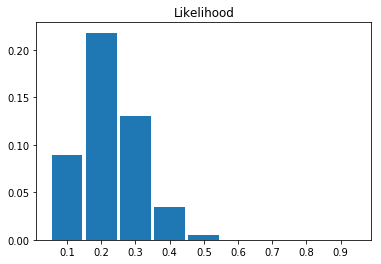

In [6]:
# Plot likelihood
plt.bar(p,likelihood, width = 0.09, align = 'center')
plt.xticks(p)
plt.title('Likelihood')

plt.show()

In [7]:
# Calculate posterior
def calculate_posterior(likelihood, priors): 
    posterior = []
    numerator = []
    denominator = 0
    sum_posterior = 0

    for idx, l in enumerate(likelihood): 
        n = l*priors[idx]
        numerator.append(n)
        denominator += n

    for n in numerator: 
        post = n/denominator
        posterior.append(post)
        sum_posterior += post
    return posterior

In [8]:
posterior = calculate_posterior(likelihood, priors)
posterior

[0.1747657588054092,
 0.4247525261561481,
 0.25388079818262665,
 0.0681139658670459,
 0.07795219988481285,
 0.0005249779452308352,
 9.74784088413578e-06,
 2.5317223438986984e-08,
 6.187941990166642e-13]

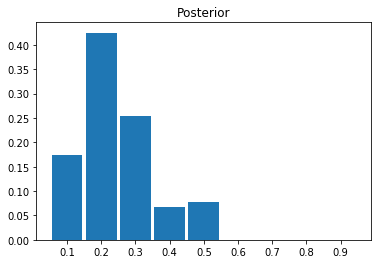

In [9]:
# Plot posterior
plt.bar(p,posterior, width = 0.09, align = 'center')
plt.xticks(p)
plt.title('Posterior')

plt.show()

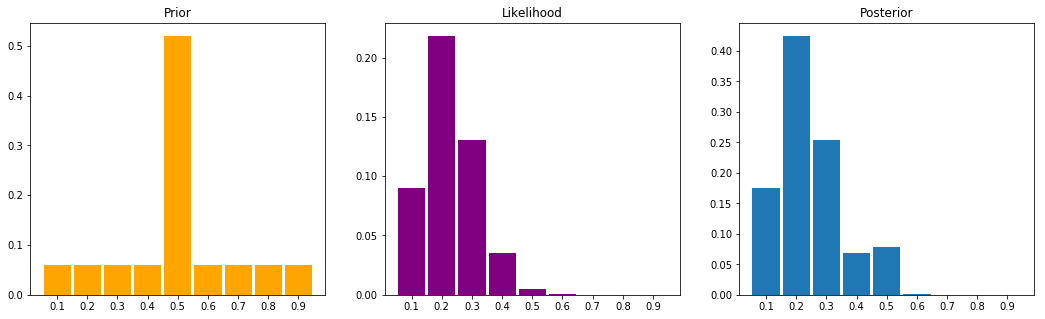

In [10]:
# Plot prior, likelihood and posterior 
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
#p = np.linspace(0.1, 0.9, num=9)
priors = [0.06, 0.06, 0.06, 0.06, 0.52, 0.06, 0.06, 0.06, 0.06]
plt.bar(p, priors, width = 0.09, align = 'center', color='orange')
plt.xticks(p)
plt.title('Prior')
    
plt.subplot(1, 3, 2)
plt.bar(p,likelihood, width = 0.09, align = 'center', color='purple')
plt.xticks(p)
plt.title('Likelihood')

plt.subplot(1, 3, 3)
plt.bar(p,posterior, width = 0.09, align = 'center')
plt.xticks(p)
plt.title('Posterior')

plt.show()

## Effect of sample size on the posterior (week 1)

Suppose the sample size has 40 observations and 8 cases of successes, as opposed to 20 and 4.  
$\qquad$ $\qquad$ $\qquad$ $\qquad$ $\qquad$ n = 200 $\qquad$   $\qquad$     k = 40   

*Note: 20% ratio between sample size and number of successes is mantained.*   

In [11]:
likelihood = binomial_likelihood(40, 200, p)
posterior = calculate_posterior(likelihood, priors)

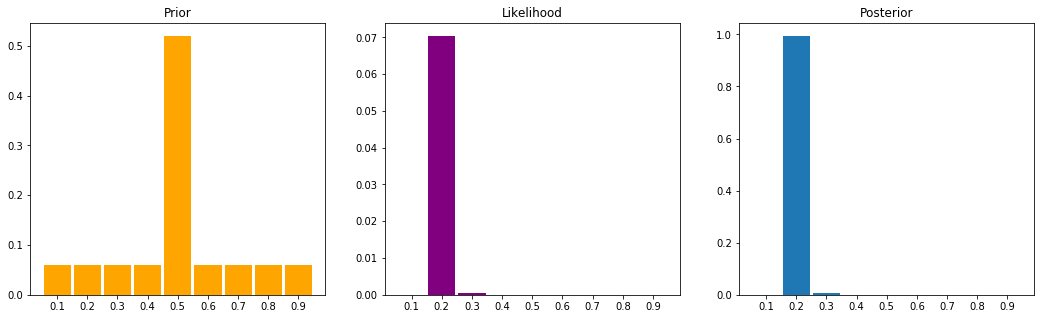

In [12]:
# Plot prior, likelihood and posterior 
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
priors = [0.06, 0.06, 0.06, 0.06, 0.52, 0.06, 0.06, 0.06, 0.06]
plt.bar(p, priors, width = 0.09, align = 'center', color='orange')
plt.xticks(p)
plt.title('Prior')
    
plt.subplot(1, 3, 2)
plt.bar(p,likelihood, width = 0.09, align = 'center', color='purple')
plt.xticks(p)
plt.title('Likelihood')

plt.subplot(1, 3, 3)
plt.bar(p,posterior, width = 0.09, align = 'center')
plt.xticks(p)
plt.title('Posterior')

plt.show()

**As more data are collected, the likelihood ends up dominating the prior**

## M&M's Example (week 1)

**Hypotheses:** $H_1$: 10%  $\qquad$ $\qquad$$\qquad$ $\quad$ **Prior:** $P(H_1)$=0.5    
 $\qquad$ $\qquad$ $H_2$: 20% $\qquad$ $\qquad$ $\qquad$ $\quad$ $\qquad$  $P(H_2)$=0.5    
Since we don't have any reason to believe one hypotheses is more likely than the other, we can place a 0.5 probability on each one.    
    
Sample equals to 5 m&m's: **<span style="color:red">R</span><span style="color:green">G</span><span style="color:yellow">Y</span><span style="color:blue">B</span><span style="color:orange">O</span>**   


In [13]:
# Calculate likelihood using binomial distribuition 
likelihood = binomial_likelihood(1, 5, [0.1,0.2])
likelihood

[0.3280499999999999, 0.40959999999999985]

In [15]:
# Calculate posterior 
posterior = calculate_posterior(likelihood, [0.5, 0.5])
posterior

[0.4447231071646445, 0.5552768928353555]

## Quiz Examples (week 1)

You are told that a coin has one of the following, with the probability of heads under that event noted next to it in parentheses:    

- a strong tails bias (p = 0.2)   
- a weak tails bias (p = 0.4)   
- no bias (p = 0.5)   
- a weak heads bias (p = 0.6)   
- a strong heads bias (p = 0.8)   
    
You assign a prior probability of 1/2 that the coin is fair and distribute the remaining 1/2 prior probability equally over the other four possible scenarios. You flip the coin three times and it comes up heads all three times. What is the posterior probability that the coin is biased towards heads?

In [18]:
priors = [0.125, 0.125, 0.5, 0.125, 0.125] 
p = [0.2, 0.4, 0.5, 0.6, 0.8]
likelihood = binomial_likelihood(3, 3, p)
likelihood

[0.008000000000000004,
 0.06400000000000002,
 0.12500000000000003,
 0.21599999999999997,
 0.5120000000000001]

In [20]:
posterior = calculate_posterior(likelihood, priors)
posterior

[0.006153846153846156,
 0.04923076923076923,
 0.38461538461538464,
 0.1661538461538461,
 0.39384615384615385]

Strong heads bias + Weak heads bias = Bias towards head    
0.3938 + 0.1661 $\approx$ 0.56


## 